In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
from collections import Counter

Non-Vegetarian

In [41]:
model_df = pd.read_csv("/Users/unasantos/Documents/GitHub/SURP2025/Data/ModelDF.csv")
final_results_nonveg = pd.read_csv("/Users/unasantos/Documents/GitHub/SURP2025/V-vs-D/VD_Results_NonVeg.csv")
slider_df = pd.read_csv("/Users/unasantos/Documents/GitHub/SURP2025/Data/SliderIngs.csv",header=None)

In [42]:
output_directory = "validity_vs_rating_plots_nonveg"
os.makedirs(output_directory,exist_ok=True)

In [43]:
rated_nonveg_ingredients = [str(ing).strip() for ing in slider_df.iloc[1].dropna()]
print(rated_nonveg_ingredients)

rating_cols = [f"Rating.{i+1}" for i in range(len(rated_nonveg_ingredients))]


['Tomatoes', 'Mayonnaise', 'Turkey', 'Bacon', 'Chicken', 'Cheddar cheese', 'Swiss cheese', 'Lettuce', 'Provolone cheese', 'Spinach']


Pearson Correlation - Tomatoes: -0.0733487243315952
P-Value - Tomatoes: 0.3806099990466476
Standard Error: 0.003684706934679408
Pearson Correlation - Mayonnaise: -0.04555723139363768
P-Value - Mayonnaise: 0.5916646129024223
Standard Error: 0.0038377693532042475
Pearson Correlation - Turkey: 0.012305050942140874
P-Value - Turkey: 0.8840310622548332
Standard Error: 0.0037918094595985525
Pearson Correlation - Bacon: -0.027680896476666543
P-Value - Bacon: 0.747239912913894
Standard Error: 0.0041640470511281665
Pearson Correlation - Chicken: -0.0027516747225520707
P-Value - Chicken: 0.9740731337450648
Standard Error: 0.0055824662069036135
Pearson Correlation - Cheddar cheese: -0.06732580760348021
P-Value - Cheddar cheese: 0.4309975434899841
Standard Error: 0.0041759598831815955
Pearson Correlation - Swiss cheese: 0.1303075929041164
P-Value - Swiss cheese: 0.12218487137659012
Standard Error: 0.004457560247085087
Pearson Correlation - Lettuce: 0.017047318936265283
P-Value - Lettuce: 0.8409813

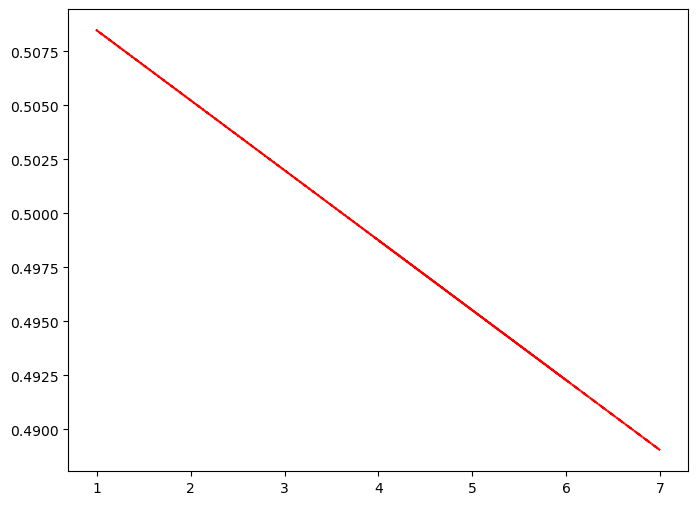

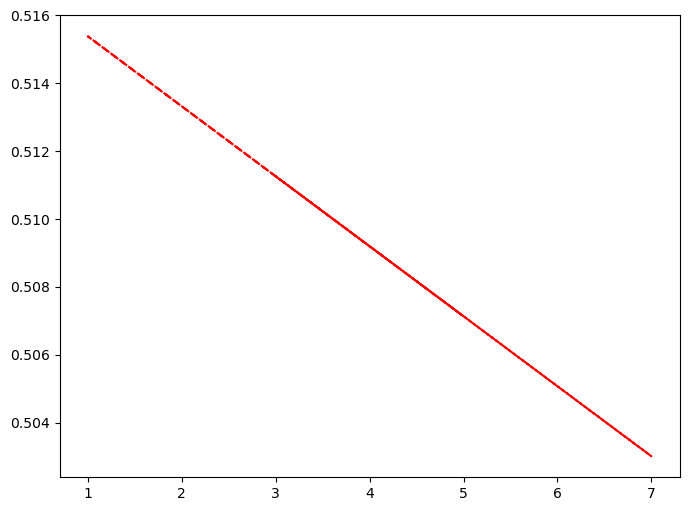

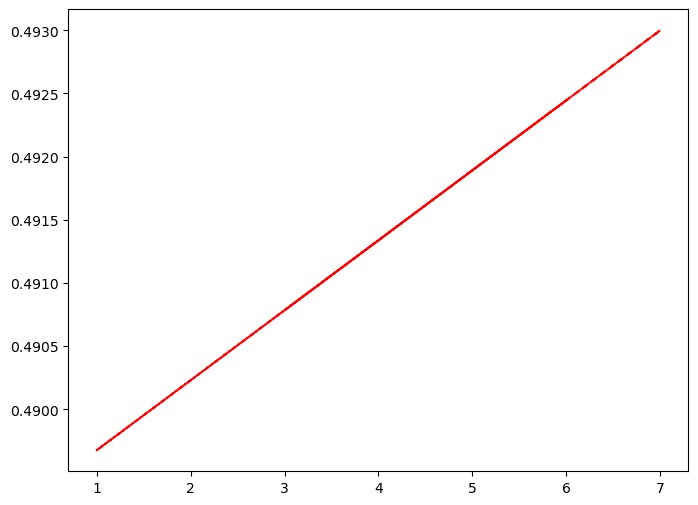

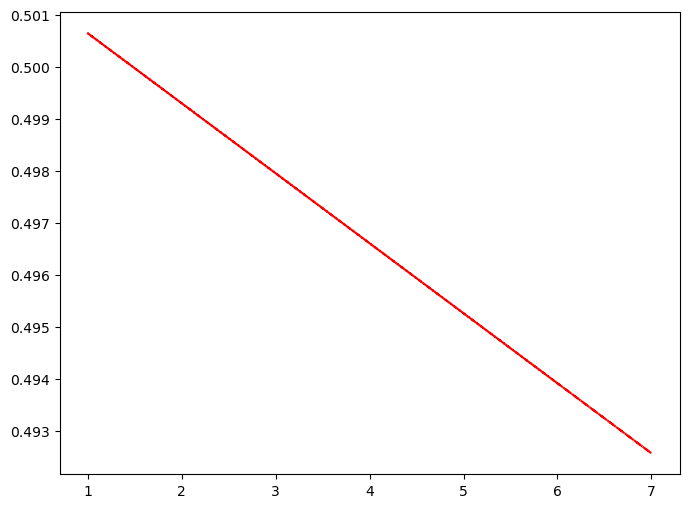

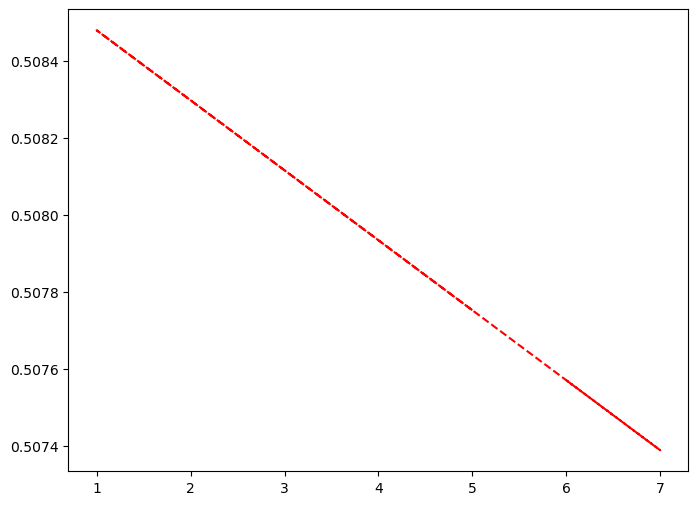

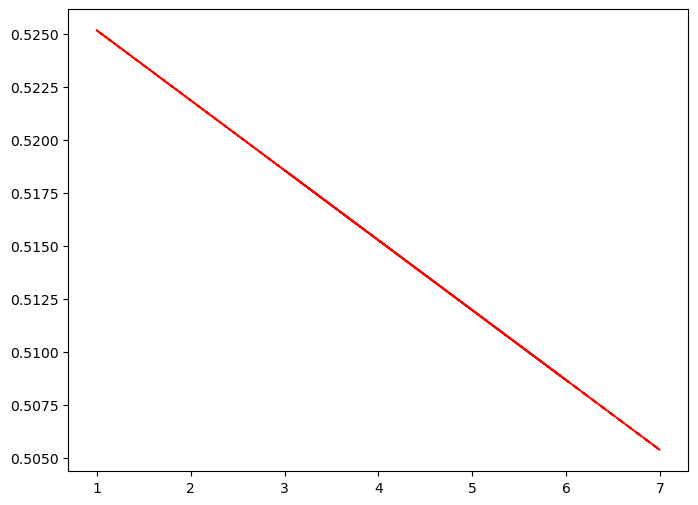

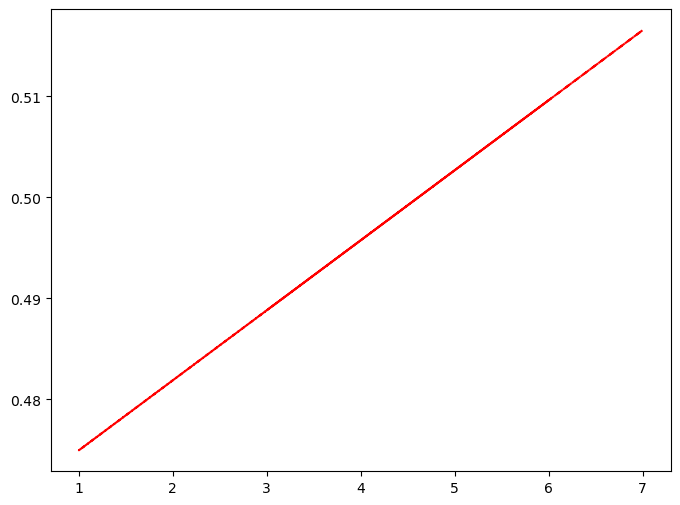

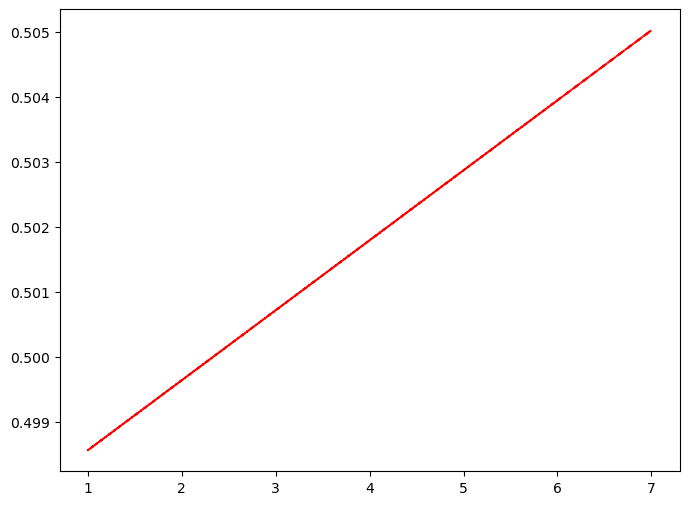

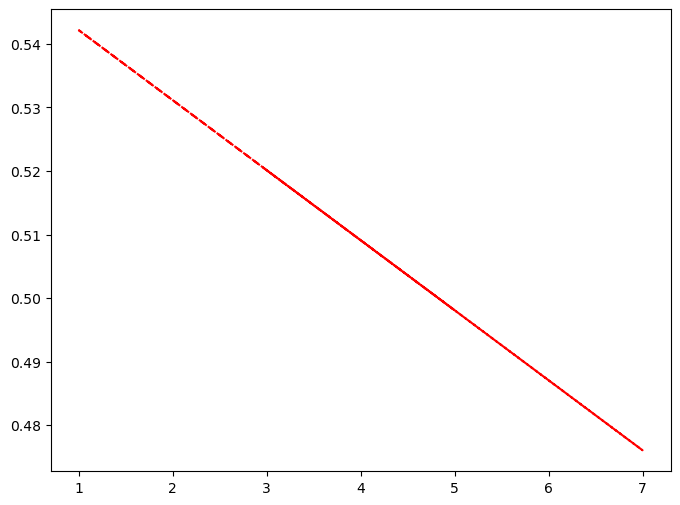

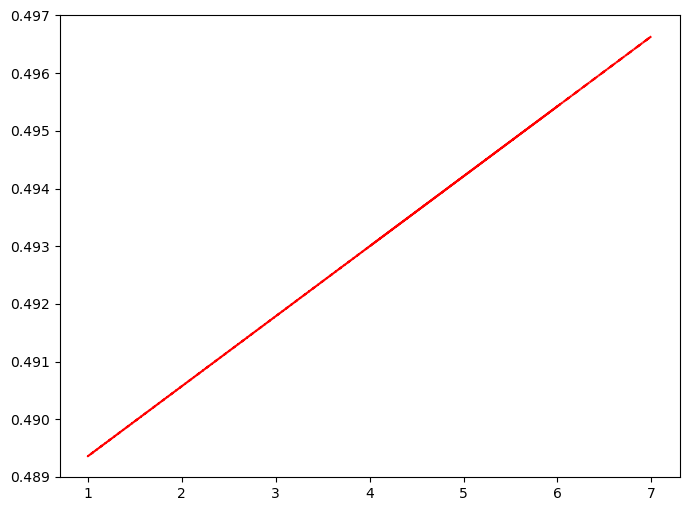

In [44]:
for ing, rating_col in zip(rated_nonveg_ingredients,rating_cols):
    v_col = f"V_{ing}"

    if v_col not in final_results_nonveg.columns or rating_col not in model_df.columns:
        print(f"Skipping {ing} — missing column in data.")
        continue

    df = pd.DataFrame()
    df['Participant'] = final_results_nonveg['Participant']
    df['Validity'] = final_results_nonveg[v_col]
    df['SelfRating'] = model_df[rating_col]
    df = df.dropna()

    x = df["SelfRating"]
    y = df["Validity"]

    slope,intercept,r_value,p_value,std_error = linregress(x,y)
    regression_line = slope * x + intercept
    
    results = {
    "Ingredient": {ing},
    "Pearson Correlation": r_value,
    "P-Value": p_value,
    "StandardError": std_error}

    # Convert to DataFrame
    correlation_results_nonveg = pd.DataFrame([results])

    # Append or create a new CSV file
    correlation_results_nonveg.to_csv("correlation_results_nonveg.csv", mode="a", index=False, header=not pd.io.common.file_exists("correlation_results_nonveg.csv"))

    print(f"Pearson Correlation - {ing}:",r_value)
    print(f"P-Value - {ing}:",p_value)
    print(f"Standard Error:",std_error)

    #plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, regression_line, color="red", linestyle="--", label=f"y = {slope:.2f}x + {intercept:.2f}\n$r$ = {r_value:.2f}, $p$ = {p_value:.3f}")
    xy_pairs = list(zip(df["SelfRating"], df["Validity"]))
    xy_counts = Counter(xy_pairs)

    # Prepare data for plotting
    xs = [pair[0] for pair in xy_counts]
    ys = [pair[1] for pair in xy_counts]
    sizes = [xy_counts[pair] * 30 for pair in xy_counts]  # scale factor for visibility

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, regression_line, color="red", linestyle="--", label=f"y = {slope:.2f}x + {intercept:.2f}\n$r$ = {r_value:.2f}, $p$ = {p_value:.3f}")
    plt.scatter(xs, ys, s=sizes, color='orange', edgecolor='black', alpha=0.7)
    plt.xlabel(f'Self-Rated Preference for {ing}')
    plt.ylabel(f'Validity (V) for {ing}')
    plt.title(f'Validity vs Self-Rating: {ing}\nPearson r = {r_value:.2f}')
    plt.grid(True)
    plt.tight_layout()

    filename = f"ValidityvsSelf_NonVeg_{ing}.png"
    filepath = os.path.join(output_directory, filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    plt.close()
   
 

Vegetarian

In [45]:
output_directory = "validity_vs_rating_plots_veg"
os.makedirs(output_directory,exist_ok=True)

In [46]:
# Row 2 of SliderIngs.csv = vegetarian ingredients
veg_ingredients = [str(x).strip() for x in slider_df.iloc[2].dropna()]
rating_cols = [f"Rating.{i+1}" for i in range(len(veg_ingredients))]

final_results_veg = pd.read_csv("/Users/unasantos/Documents/GitHub/SURP2025/V-vs-D/VD_Results_Veg.csv")


Pearson Correlation - Tomatoes: 0.5282205905740657
P-Value - Tomatoes: 0.07750161015330109
Standard Error: 0.01931062079060643
Pearson Correlation - Onions: 0.06938201444259885
P-Value - Onions: 0.8303463846304916
Standard Error: 0.01391307754625059
Pearson Correlation - Cucumbers: -0.32163376045133857
P-Value - Cucumbers: 0.30798072479372024
Standard Error: 0.026028406418954222
Pearson Correlation - Lettuce: 0.2568423853566746
P-Value - Lettuce: 0.42032400000411607
Standard Error: 0.012062663350054636
Pearson Correlation - Avocado: 0.4408256145171119
P-Value - Avocado: 0.151458880117743
Standard Error: 0.028677509446507314
Pearson Correlation - Sprouts: 0.3367651026299218
P-Value - Sprouts: 0.2844463726311442
Standard Error: 0.01489961910879219
Pearson Correlation - Provolone cheese: 0.037781832156935286
P-Value - Provolone cheese: 0.907198010630496
Standard Error: 0.013468374800759917
Pearson Correlation - Peppers: -0.07290616848733832
P-Value - Peppers: 0.8313075770083195
Standard E

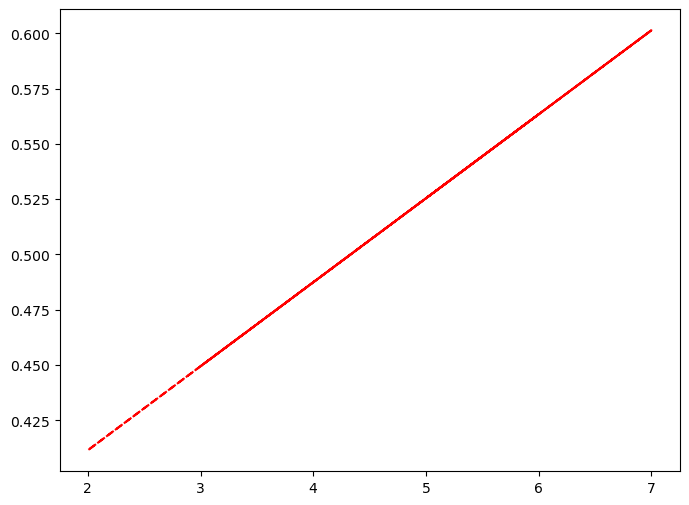

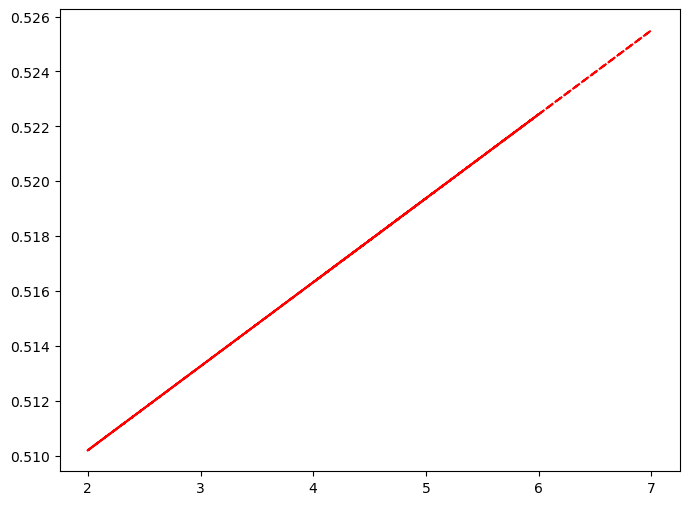

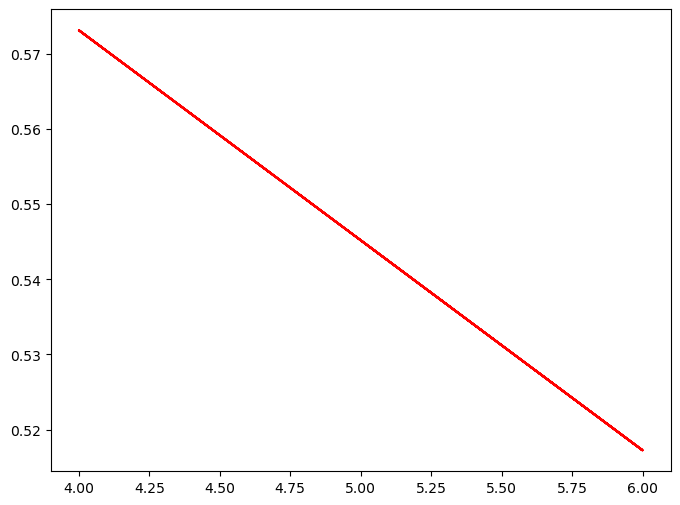

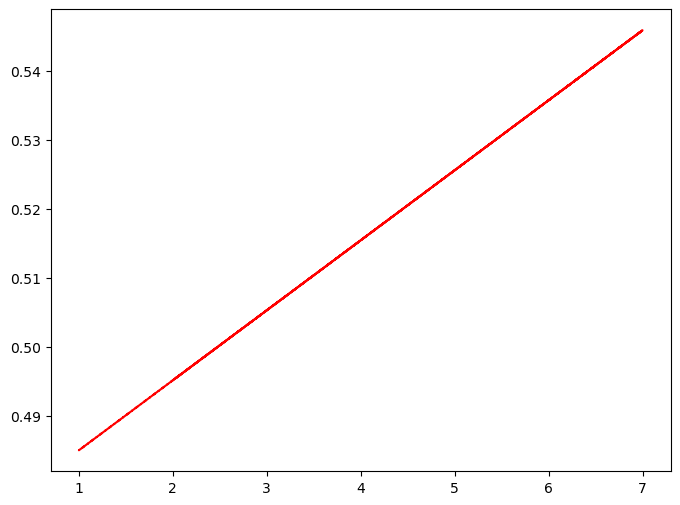

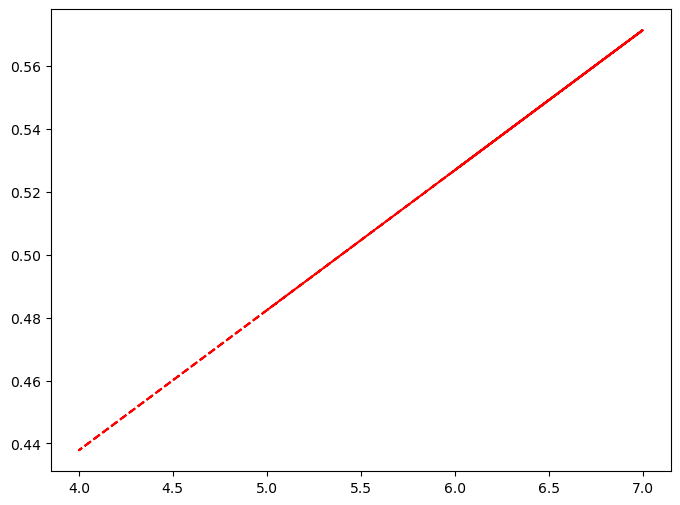

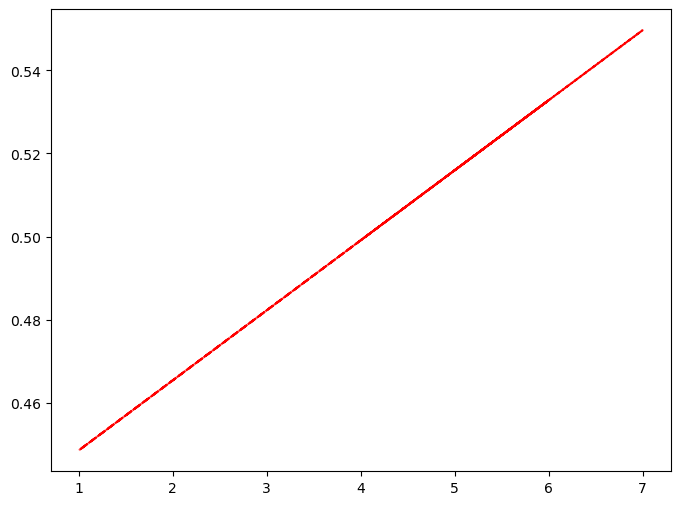

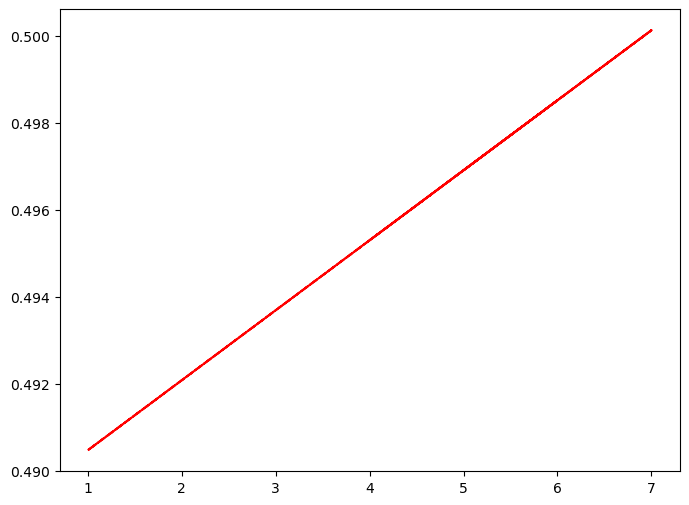

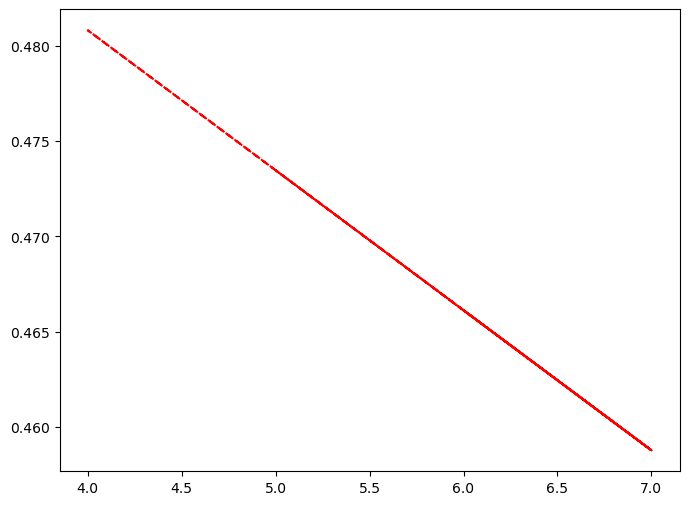

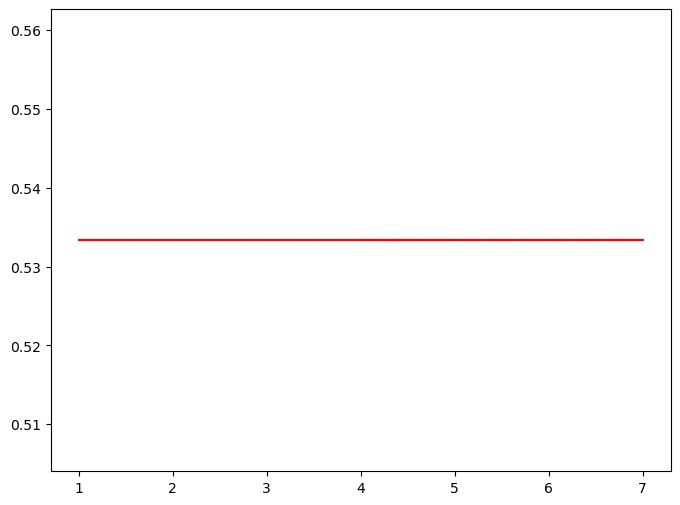

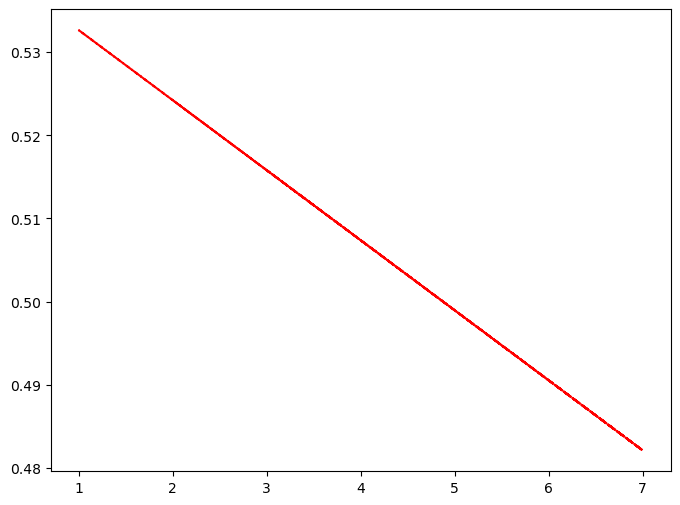

In [47]:
for ing, rating_col in zip(veg_ingredients,rating_cols):
    v_col = f"V_{ing}"

    if v_col not in final_results_veg.columns or rating_col not in model_df.columns:
        print(f"Skipping {ing} — missing column in data.")
        continue

    df = pd.DataFrame()
    df['Participant'] = final_results_veg['Participant']
    df['Validity'] = final_results_veg[v_col]
    df['SelfRating'] = model_df[rating_col]
    df = df.dropna()

    x = df["SelfRating"]
    y = df["Validity"]

    slope,intercept,r_value,p_value,std_error = linregress(x,y)
    regression_line = slope * x + intercept
    
    results = {
    "Ingredient": {ing},
    "Pearson Correlation": r_value,
    "P-Value": p_value,
    "StandardError": std_error}

    # Convert to DataFrame
    correlation_results_veg = pd.DataFrame([results])

    # Append or create a new CSV file
    correlation_results_veg.to_csv("correlation_results_veg.csv", mode="a", index=False, header=not pd.io.common.file_exists("correlation_results_veg.csv"))

    print(f"Pearson Correlation - {ing}:",r_value)
    print(f"P-Value - {ing}:",p_value)
    print(f"Standard Error:",std_error)

    #plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, regression_line, color="red", linestyle="--", label=f"y = {slope:.2f}x + {intercept:.2f}\n$r$ = {r_value:.2f}, $p$ = {p_value:.3f}")
    xy_pairs = list(zip(df["SelfRating"], df["Validity"]))
    xy_counts = Counter(xy_pairs)

    # Prepare data for plotting
    xs = [pair[0] for pair in xy_counts]
    ys = [pair[1] for pair in xy_counts]
    sizes = [xy_counts[pair] * 30 for pair in xy_counts]  # scale factor for visibility

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, regression_line, color="red", linestyle="--", label=f"y = {slope:.2f}x + {intercept:.2f}\n$r$ = {r_value:.2f}, $p$ = {p_value:.3f}")
    plt.scatter(xs, ys, s=sizes, color='green', edgecolor='black', alpha=0.7)
    plt.xlabel(f'Self-Rated Preference for {ing}')
    plt.ylabel(f'Validity (V) for {ing}')
    plt.title(f'Validity vs Self-Rating: {ing}\nPearson r = {r_value:.2f}')
    plt.grid(True)
    plt.tight_layout()

    filename = f"ValidityvsSelf_Veg_{ing}.png"
    filepath = os.path.join(output_directory, filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    plt.close()

 